# Importing Libraries

In [1]:
import pandas as pd
from pandas import to_datetime
import numpy as np
import seaborn as sns
import cufflinks as cf
import plotly.express as px
import plotly.express.colors as colors
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.offline as pyo
import glob
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

# Seeing The Combined Data

In [2]:
extension = glob.glob('*csv')
print(extension)
                      

['Abuja_Branch.csv', 'Lagos_Branch.csv', 'Port_Harcourt_Branch.csv']


In [3]:
csv_files = (pd.read_csv(file) for file in extension)
df = pd.concat(csv_files, ignore_index = True)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


# Getting The Shape

In [6]:
df.shape

(1000, 17)

# Getting The Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Getting The Number Of Columns

In [8]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Getting The Mathematical Summary Of The Data

In [9]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


### The average Quantity sold was about 6 items which had a total average cost of # 116,268

### we also had a max quantity of 10 items sold to a cudtomer which brought a total amount of # 375,354

# Checking For Null Values

In [10]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# Checking For Duplicates

In [11]:
df.duplicated().sum()

0

# DATA CLEANING

## Handling The Date Column

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])


In [13]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [14]:
df['Hours'] = df['Time'].dt.hour

# Handling the Rating Column

In [15]:
ranges = [0, 4.5, 7, np.inf]
group_names = ['Bad Experience', 'Satisfied', 'Very Satisfied']
df['Rating_Group'] = pd.cut(df['Rating'], bins = ranges, labels = group_names)

In [16]:
def replace_month_number_with_name(date_str):
    month_names = {1: 'January',
                   2: 'February',
                   3: 'March',
                   4: 'April',
                   5: 'May',
                   6: 'June',
                   7: 'July',
                   8: 'August',
                   9: 'September',
                   10: 'October',
                   11: 'November',
                   12: 'December'} 
    return month_names[int(date_str)]

In [17]:
df['Month'] = df['Month'].apply(replace_month_number_with_name)

# Cleaned Dataset

In [18]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hours,Rating_Group
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2023-05-17 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,February,2019,13,Satisfied
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2023-05-17 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,February,2019,18,Bad Experience
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2023-05-17 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,March,2019,17,Satisfied
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2023-05-17 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,January,2019,16,Bad Experience
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2023-05-17 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,March,2019,15,Bad Experience


In [19]:
df['Month'].unique()

array(['February', 'March', 'January'], dtype=object)

# The Mean And Sum of The Branches

In [20]:
df.groupby('City').agg(['mean', 'sum']).round(2)

Unit price            Quantity         Tax 5%              \
                    mean        sum     mean   sum     mean         sum   
City                                                                      
Abuja           20037.34  6652396.8     5.48  1820  5483.53  1820531.52   
Lagos           19721.11  6705176.4     5.47  1859  5354.64  1820577.78   
Port Harcourt   20379.25  6684393.6     5.58  1831  5778.85  1895463.54   

                   Total                    cogs              \
                    mean          sum       mean         sum   
City                                                           
Abuja          115154.10  38231161.92  109670.57  36410630.4   
Lagos          112447.45  38232133.38  107092.81  36411555.6   
Port Harcourt  121355.90  39804734.34  115577.05  37909270.8   

              gross margin percentage          gross income              \
                                 mean      sum         mean         sum   
City                                                                      
Abuja                            4.76  1580.95      5483.53  1820531.52   
Lagos                            4.76  1619.05      5354.64  1820577.78   
Port Harcourt                    4.76  1561.90      5778.85  1895463.54   

              Rating            Day          Year          Hours        
                mean     sum   mean   sum    mean     sum   mean   sum  
City                                                                    
Abuja           6.82  2263.6  15.27  5068  2019.0  670308  15.15  5029  
Lagos           7.03  2389.2  15.39  5232  2019.0  686460  14.67  4987  
Port Harcourt   7.07  2319.9  15.11  4956  2019.0  662232  14.92  4894

# EXPLORATORY DATA ANALYSIS(E.D.A)

# Gross Income Per City

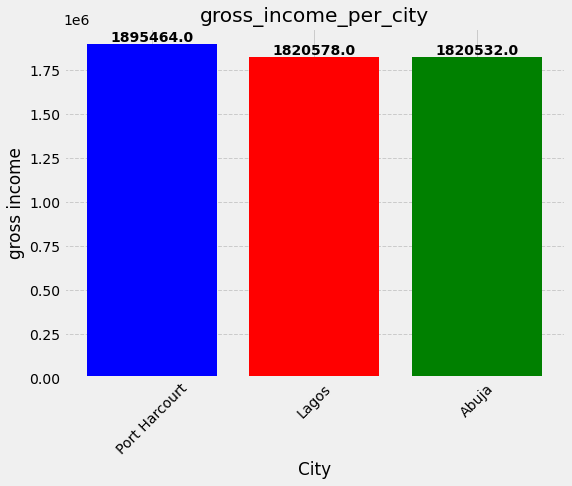

In [21]:
gross_income_per_city = df.groupby('City')['gross income'].sum().sort_values(ascending = False).round()

plt.figure(figsize=(8, 6)) # create figure before plotting
plt.bar(gross_income_per_city.index, gross_income_per_city.values, color=['blue', 'red', 'green'])

plt.title('gross_income_per_city')
plt.xlabel('City')
plt.ylabel('gross income')

plt.xticks(rotation=45)
for i, v in enumerate(gross_income_per_city.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
    
plt.grid(True, axis='y', linestyle='--')

plt.savefig('chart.png', dpi=300, bbox_inches='tight')
plt.show()


# Definig A Function For Our Plot

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_countplot_with_percentage(data, x_label, title, label_spacing=5, label_fontsize=10, label_fontweight='bold'):
    # Create the countplot
    ax = sns.countplot(x=data)

    # Calculate the percentages of each bar
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total:.1%} of {total}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', xytext=(0, label_spacing), textcoords='offset points',
                    fontsize=label_fontsize, fontweight=label_fontweight)

    # Set the labels and title
    ax.set_xlabel(x_label)
    ax.set_ylabel('Count')
    ax.set_title(title, fontsize=16, fontweight='bold', y=1.05)

    # Display the plot
    plt.show()

# City With The Highest Sales

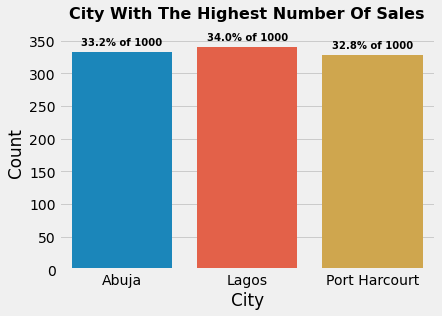

In [54]:
# Usage:
plot_countplot_with_percentage(df['City'], 'City', 'City With The Highest Number Of Sales')

# Most Used Payment Method

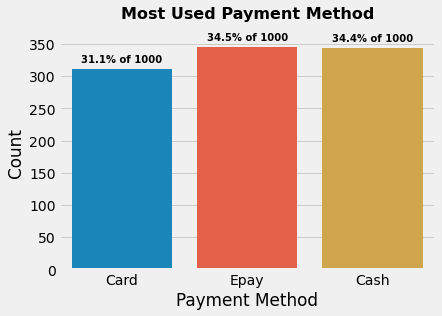

In [55]:
# Usage:
plot_countplot_with_percentage(df['Payment'], 'Payment Method', 'Most Used Payment Method')

# The Most Used Product line by Gender

In [31]:
import pandas as pd
import plotly.graph_objects as go

grouped_df = df.groupby(['Product line', 'Gender']).size().reset_index(name='count')
total_counts = grouped_df.groupby('Product line')['count'].transform('sum')
grouped_df['percentage'] = (grouped_df['count'] / total_counts) * 100

fig = go.Figure()

fig.add_trace(go.Bar(
    y=grouped_df.loc[grouped_df['Gender'] == 'Male', 'Product line'],
    x=grouped_df.loc[grouped_df['Gender'] == 'Male', 'count'],
    text=grouped_df.loc[grouped_df['Gender'] == 'Male', 'percentage'].round(2).astype(str) + '%',
    name='Male',
    orientation='h',
))

fig.add_trace(go.Bar(
    y=grouped_df.loc[grouped_df['Gender'] == 'Female', 'Product line'],
    x=grouped_df.loc[grouped_df['Gender'] == 'Female', 'count'],
    text=grouped_df.loc[grouped_df['Gender'] == 'Female', 'percentage'].round(2).astype(str) + '%',
    name='Female',
    orientation='h',
))

fig.update_layout(
    title='The Most Used Product line',
    yaxis=dict(title='Product line'),
    xaxis=dict(title='Count'),
    barmode='stack',
    height=500,
    width=800
)

fig.show()


# The Most Used Payment Method For Each Product line

In [35]:
import pandas as pd
import plotly.graph_objects as go

grouped_df = df.groupby(['Product line', 'Payment']).size().reset_index(name='count')

fig = go.Figure()

for product_line in grouped_df['Product line'].unique():
    product_line_df = grouped_df[grouped_df['Product line'] == product_line]
    total_counts = product_line_df['count'].sum()
    product_line_df['percentage'] = (product_line_df['count'] / total_counts) * 100
    
    fig.add_trace(go.Bar(
        y=product_line_df['Payment'],
        x=product_line_df['count'],
        text=product_line_df['percentage'].round(2).astype(str) + '%',
        name=product_line,
        orientation='h',
    ))

fig.update_layout(
    title='The Most Used Payment Method For Each Product line',
    yaxis=dict(title='Payment Method'),
    xaxis=dict(title='Count'),
    barmode='stack',
    height=500,
    width=800
)

fig.show()


# Payment Channel For Each Branch

In [36]:
import pandas as pd
import plotly.graph_objects as go

grouped_df = df.groupby(['Payment', 'City']).size().reset_index(name='count')

fig = go.Figure()

for payment in grouped_df['Payment'].unique():
    payment_df = grouped_df[grouped_df['Payment'] == payment]
    total_counts = payment_df['count'].sum()
    payment_df['percentage'] = (payment_df['count'] / total_counts) * 100
    
    fig.add_trace(go.Bar(
        y=payment_df['City'],
        x=payment_df['count'],
        text=payment_df['percentage'].round(2).astype(str) + '%',
        name=payment,
        orientation='h',
    ))

fig.update_layout(
    title='Payment Channel For Each Branch',
    yaxis=dict(title='Branch City'),
    xaxis=dict(title='Count'),
    barmode='stack',
    height=500,
    width=800
)

fig.show()


# Average Gross Income Per Month

Text(0.5, 1.0, 'Average Gross Income Per Month')

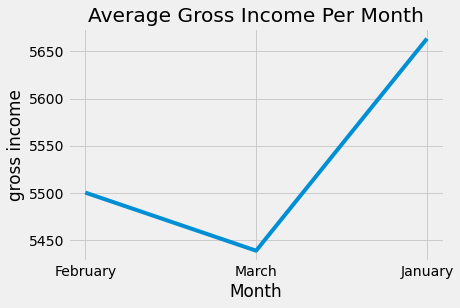

In [28]:
sns.lineplot(x = 'Month', y = 'gross income', data = df, ci = None)
plt.title('Average Gross Income Per Month')

# Rating Per Gender

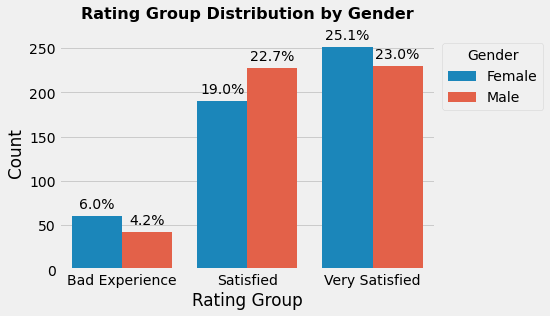

In [29]:
# Create the countplot
ax = sns.countplot(x=df['Rating_Group'], hue=df['Gender'])

# Calculate the percentages of each bar
total = len(df['Rating_Group'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# Adjust the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Gender', bbox_to_anchor=(1, 1), loc='upper left')

# Set the labels and title
ax.set_xlabel('Rating Group')
ax.set_ylabel('Count')
ax.set_title('Rating Group Distribution by Gender', fontsize=16, fontweight='bold', y=1.05)

# Display the plot
plt.show()


# Rating Per City

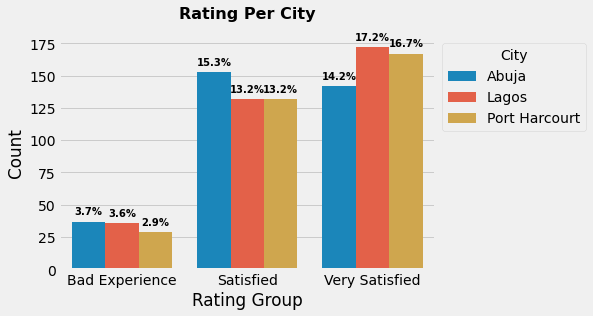

In [44]:
# Create the countplot
ax = sns.countplot(x=df['Rating_Group'], hue=df['City'])

# Calculate the percentages of each bar
total = len(df['Rating_Group'])
label_spacing = 5  # Adjust the spacing between the labels
label_fontsize = 10  # Adjust the fontsize of the labels
label_fontweight = 'bold'  # Adjust the fontweight of the labels

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, label_spacing), textcoords='offset points',
                fontsize=label_fontsize, fontweight=label_fontweight)

# Adjust the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='City', bbox_to_anchor=(1, 1), loc='upper left')

# Set the labels and title
ax.set_xlabel('Rating Group')
ax.set_ylabel('Count')
ax.set_title('Rating Per City', fontsize=16, fontweight='bold', y=1.05)

# Display the plot
plt.show()
